# FORMULARIO PARCIAL APRENDIZAJE AUTOMÁTICO

# ÍNDICE

...

# TEMA 1: Configuración y Visualización del Entorno

## 1.1 Configuración de las Rutas de Importación

Se añade el directorio padre (..) al path (sys.path), lo que permite al entorno de Python acceder a módulos o paquetes ubicados en directorios superiores al actual. Esto es útil para poder importar scripts o paquetes personalizados sin tener que mover ficheros o el directorio de trabajo.

In [219]:
import sys
sys.path.insert(0, '..')

## 1.2 Verificación de las Versiones de los Paquetes

Se utiliza la función check_packages() para verificar que los paquetes y sus respectivas versiones indicadas en el diccionario 'd' estén instalados correctamente dentro del entorno. Este paso es importante para verificar la compatibilidad de cada paquete para poder evitar errores por diferencia de versión.

In [220]:
from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'scipy': '1.7.0',
    'mlxtend' : '0.19.0',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2'
}
check_packages(d)

[OK] numpy 1.24.3
[OK] scipy 1.8.0
[OK] mlxtend 0.23.1
[OK] matplotlib 3.5.1
[OK] sklearn 1.5.2
[OK] pandas 2.2.2


## 1.3 Visualización de Imágenes

Se utiliza display de IPython.display para renderizar una imagen en HTML.

In [221]:
from IPython.display import Image, HTML

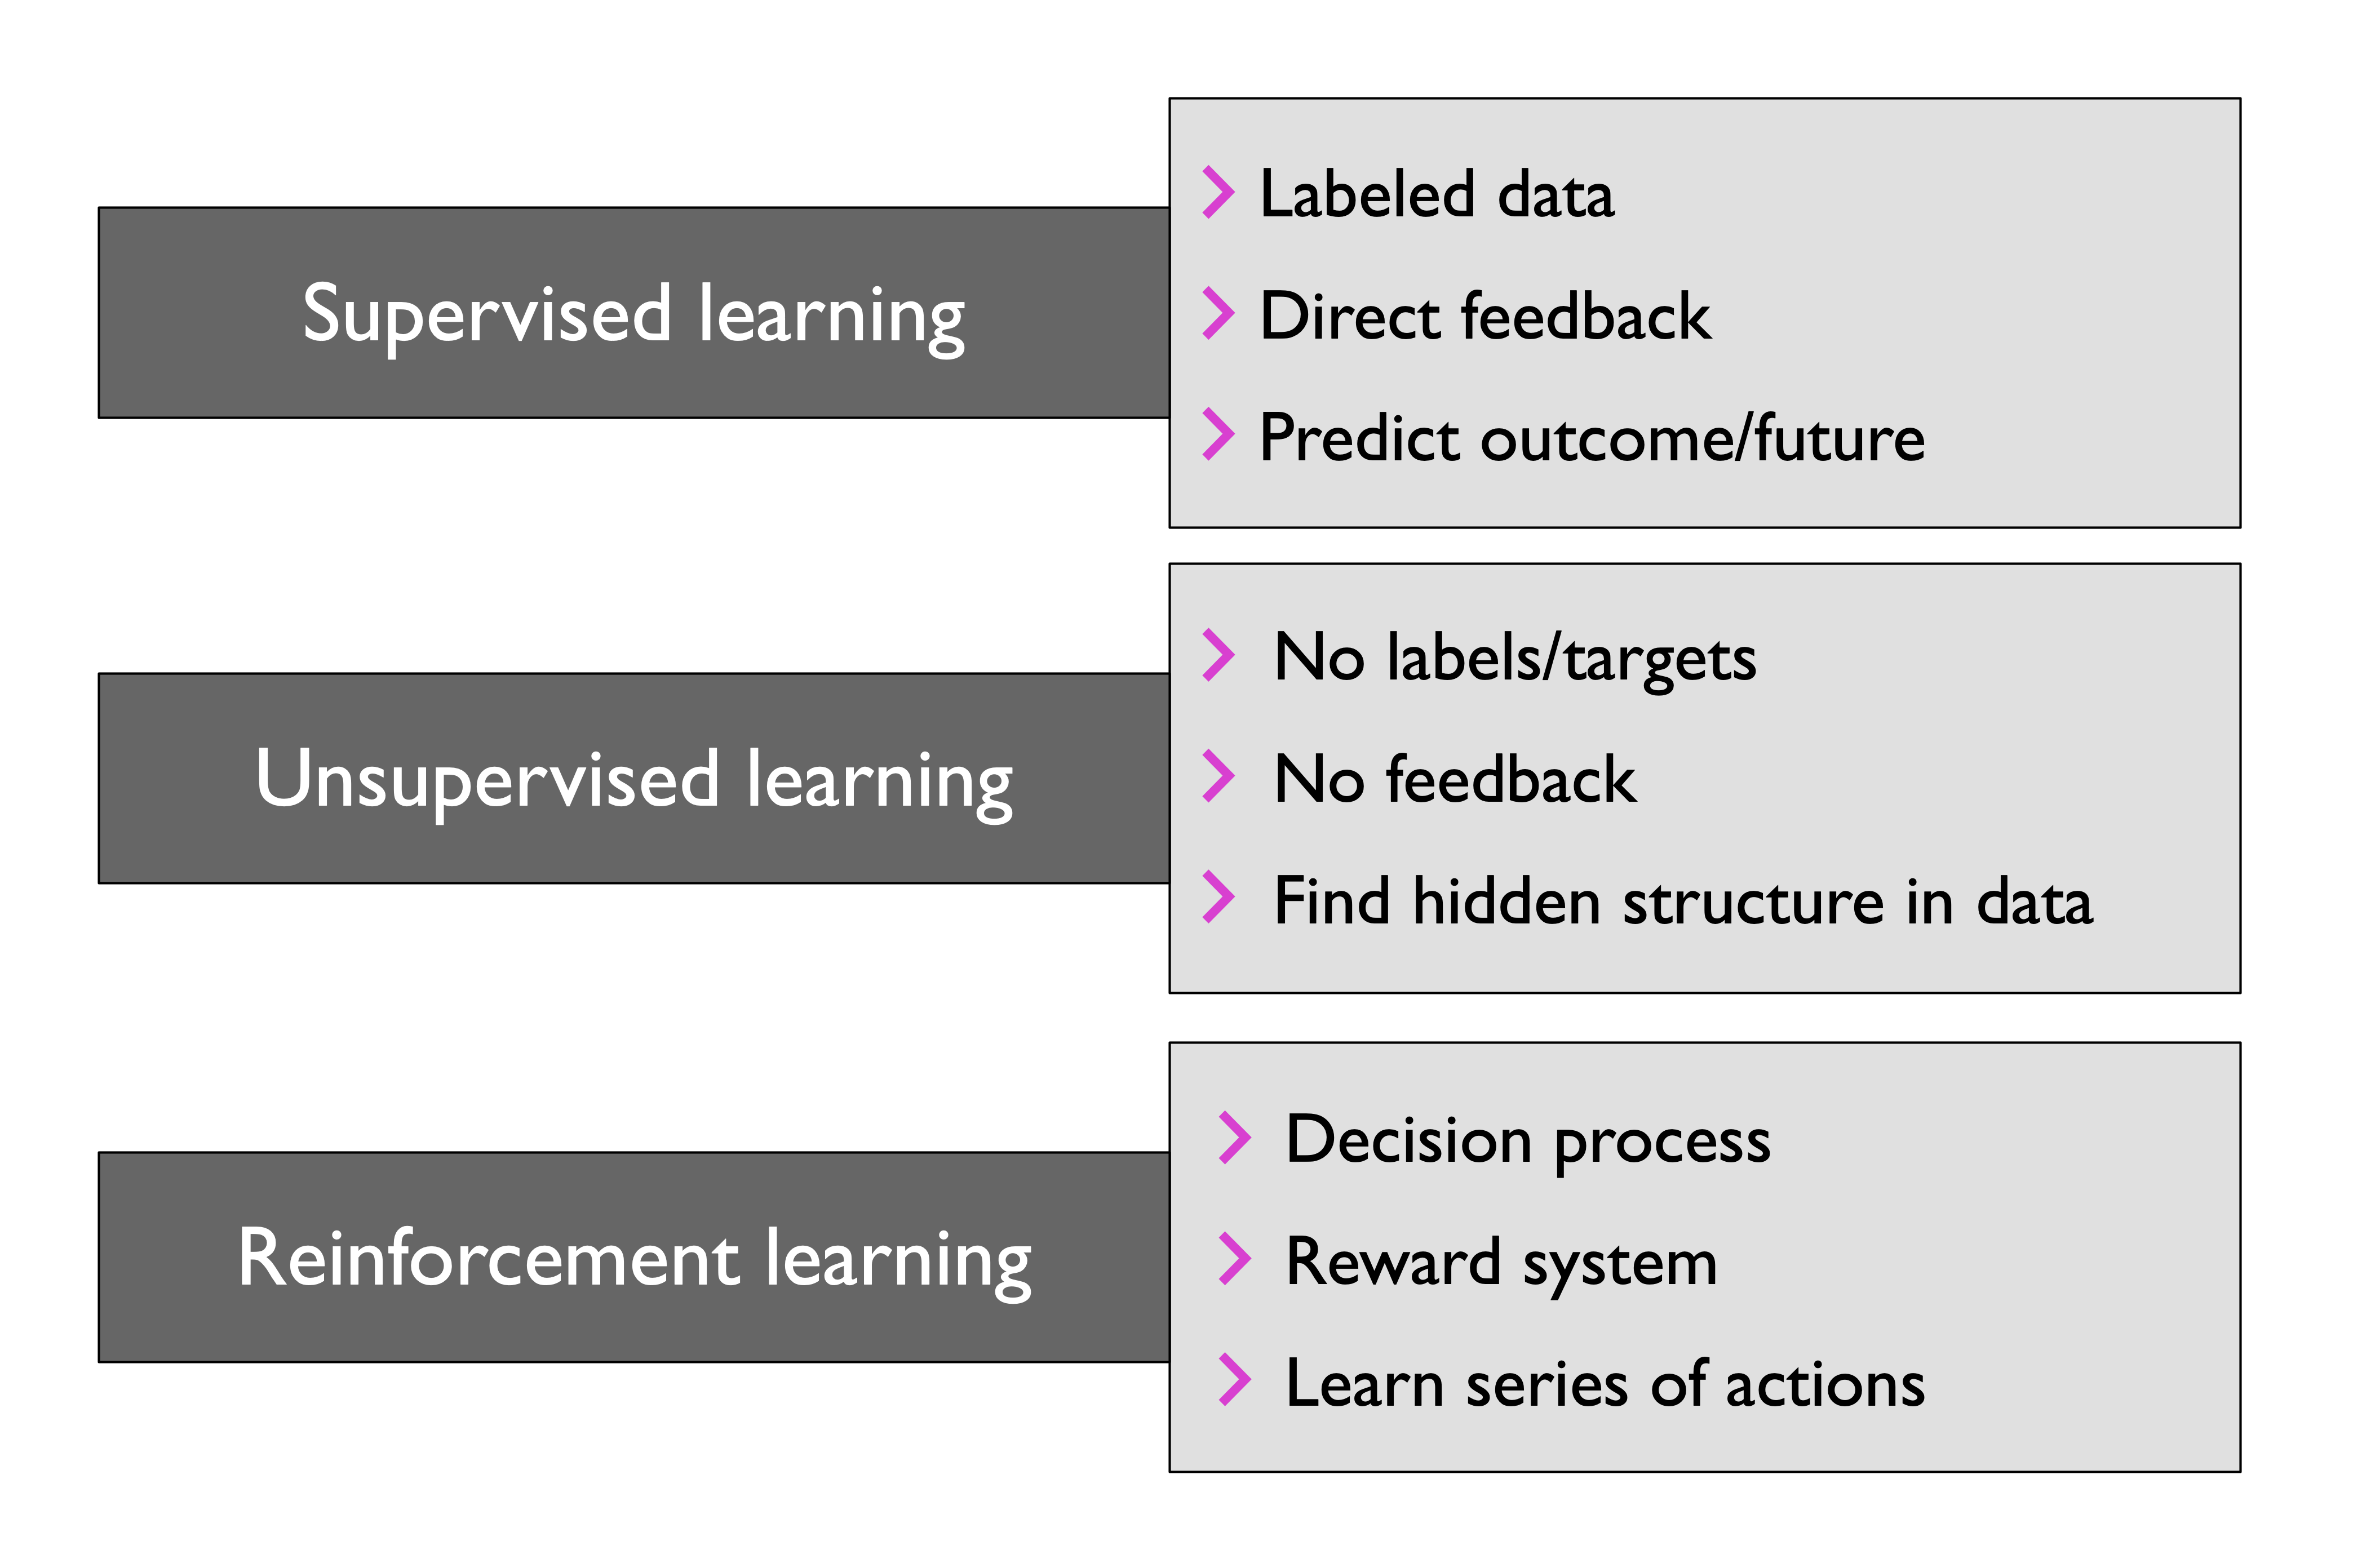

In [222]:
Image(filename='./figures/01_01.png', width=500)

Este código genera un contenedor div centrado, que muestra una imagen con unas dimensiones específicas. Esto es útil para insertar gráficos u otras figuras en el Notebook, lo que facilita la visualización de resultados o ejemplos.

In [223]:
display(HTML("""
<div style="display: flex; justify-content: center;">
    <img src="./figures/01_01.png" width="500" height="300" format="png">
</div>
"""))

## 1.4 Importación de Paquetes

Se importan los paquetes esenciales para analizar y visualizar datos: numpy para cálculos numéricos, pandas para manipular datos y matplotlib.pyplot para visualizar gráficos.

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TEMA 2: Análisis Exploratorio de Datos (Clasificadores)

## 2.1 Carga y Exploración Inicial del Dataset

En primer lugar, se carga el dataset 'dataset.csv' y se configura la visualización de todas sus columnas. Además, se exploran las características más importantes del dataset como las columnas, su forma, una muestra de los primeros registros, así como un resumen de la información general y otras estadísticas descriptivas.

In [225]:
dataset = pd.read_csv("dataset.csv")
pd.set_option('display.max_columns', len(dataset.columns))

dataset.columns
dataset.shape
dataset.head(1)
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col1    1599 non-null   float64
 1   Col2    1599 non-null   float64
 2   Col3    1599 non-null   float64
 3   Col4    1599 non-null   float64
 4   Col5    1599 non-null   float64
 5   Col6    1599 non-null   float64
 6   Col7    1599 non-null   float64
 7   Col8    1599 non-null   float64
 8   Col9    1599 non-null   float64
 9   Col10   1599 non-null   float64
 10  Col11   1599 non-null   float64
 11  Target  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.996747,3.311113,46.467792,0.658149,0.087467,10.422983,15.874922,8.319637,2.538806,0.270976,5.636023
std,0.179060,0.001887,0.154386,32.895324,0.169507,0.047065,1.065668,10.460157,1.741096,1.409928,0.194801,0.807569
min,0.120000,0.990070,2.740000,6.000000,0.330000,0.012000,8.400000,1.000000,4.600000,0.900000,0.000000,3.000000
25%,0.390000,0.995600,3.210000,22.000000,0.550000,0.070000,9.500000,7.000000,7.100000,1.900000,0.090000,5.000000
50%,0.520000,0.996750,3.310000,38.000000,0.620000,0.079000,10.200000,14.000000,7.900000,2.200000,0.260000,6.000000
75%,0.640000,0.997835,3.400000,62.000000,0.730000,0.090000,11.100000,21.000000,9.200000,2.600000,0.420000,6.000000
max,1.580000,1.003690,4.010000,289.000000,2.000000,0.611000,14.900000,72.000000,15.900000,15.500000,1.000000,8.000000


ANÁLISIS DE LOS RESULTADOS

El dataset contiene un total de 12 columnas y 1599 filas. La exploración inicial revela la media, la desviación estándar, el mínimo, el máximo y los cuartiles de cada columna, lo que permite observar detalladamente la dispersión y la distribución de los datos, además de poder detectar problemas como valores nulos o distribuciones atípicas que puedan afectar al análsis posterior.

## 2.2 Anonimización y Cálculo de la Correlación entre Características

Una vez realizado el primer análisis general de los datos, se elimina la columna 'Target' para crear un dataset anonimizado (dataset_anonymized), el cual se guarda en un fichero con el mismo nombre. Después, se calcula la matriz de correlación, que permite evaluar relaciones lineales entre las columnas.

In [226]:
# USANDO TODAS LAS CARACTERÍSTICAS DE LOS DATOS
dataset_anonymized = dataset.drop(["Target"], axis=1)
dataset_anonymized.to_csv('dataset_anonymized.csv', index=False)
dataset_anonymized.corr()

# USANDO N CARACTERÍSTICAS DE LOS DATOS
# dataset_anonymized = dataset.drop(["Target"], axis=1)
# dataset_N_characteristics = dataset_anonymized.drop(["Col1", "Col2", ..., "ColN"], axis=1)
# dataset_N_characteristics.to_csv('dataset_N_characteristics.csv', index=False)
# dataset_N_characteristics.corr()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11
Col1,1.000000,0.022026,0.234937,0.076470,-0.260987,0.061298,-0.202288,-0.010504,-0.256131,0.001918,-0.552496
Col2,0.022026,1.000000,-0.341699,0.071269,0.148506,0.200632,-0.496180,-0.021946,0.668047,0.355283,0.364947
Col3,0.234937,-0.341699,1.000000,-0.066495,-0.196648,-0.265026,0.205633,0.070377,-0.682978,-0.085652,-0.541904
Col4,0.076470,0.071269,-0.066495,1.000000,0.042947,0.047400,-0.205654,0.667666,-0.113181,0.203028,0.035533
Col5,-0.260987,0.148506,-0.196648,0.042947,1.000000,0.371260,0.093595,0.051658,0.183006,0.005527,0.312770
Col6,0.061298,0.200632,-0.265026,0.047400,0.371260,1.000000,-0.221141,0.005562,0.093705,0.055610,0.203823
Col7,-0.202288,-0.496180,0.205633,-0.205654,0.093595,-0.221141,1.000000,-0.069408,-0.061668,0.042075,0.109903
Col8,-0.010504,-0.021946,0.070377,0.667666,0.051658,0.005562,-0.069408,1.000000,-0.153794,0.187049,-0.060978
Col9,-0.256131,0.668047,-0.682978,-0.113181,0.183006,0.093705,-0.061668,-0.153794,1.000000,0.114777,0.671703
Col10,0.001918,0.355283,-0.085652,0.203028,0.005527,0.055610,0.042075,0.187049,0.114777,1.000000,0.143577


## 2.3 División de Variables Independientes y Dependiente

Después de anonimizar los datos, se separan las variables independientes (X) de la variable objetivo (y), en este caso 'Target', y se imprimen las etiquetas de clase únicas, las cuales permiten preparar el dataset para su uso en modelos de clasificación.

In [227]:
# USANDO TODAS LAS CARACTERÍSTICAS DE LOS DATOS
X = dataset_anonymized
y = dataset.get("Target")
print('Class labels:', np.unique(y))

# USANDO N CARACTERÍSTICAS DE LOS DATOS
# X = dataset_N_characteristics
# y = dataset.get("Target")
# print('Class labels:', np.unique(y))

Class labels: [3 4 5 6 7 8]


ANÁLISIS DE LOS RESULTADOS

El dataset contiene 6 clases (3, 4, 5, 6, 7 y 8), lo que implica un problema de clasificación con múltiples etiquetas. El balance entre clases se verifica a través de la distribución de etiquetas, permitiendo conocer si existe un desbalance significativo que pudiera requerir estrategias adicionales de ajuste o balanceo en el modelo.

## 2.4 Mapa de Calor de Correlaciones

Con las variables X e y ya definidas, se genera un mapa de calor que representa gráficamente a la matriz de correlación de todas las características del dataset, lo que facilita la detección visual de las relaciones entre variables.

<AxesSubplot:>

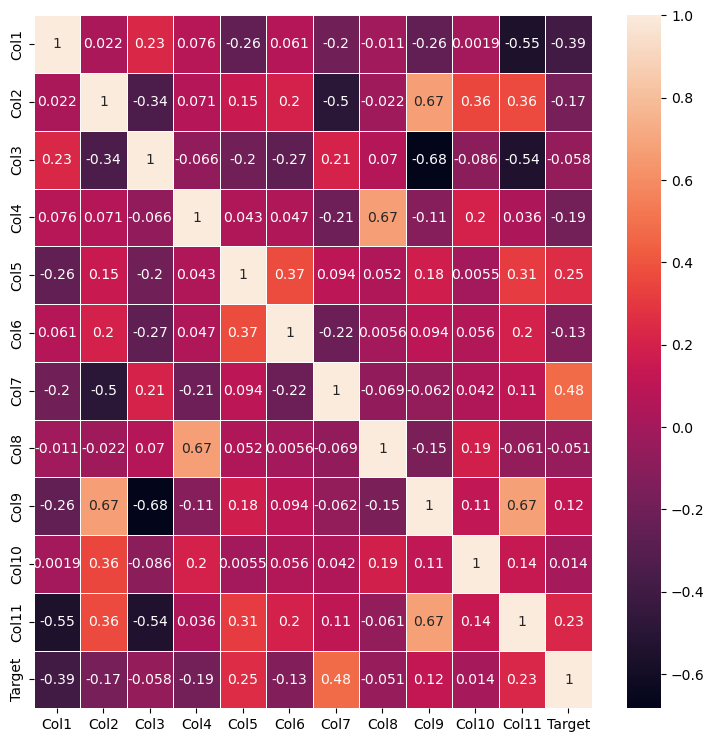

In [228]:
import seaborn as sb
fig, ax = plt.subplots(figsize=(9,9))
sb.heatmap(dataset.corr(), linewidth = 0.5, annot=True)

ANÁLISIS DE LOS RESULTADOS

Como se puede ver, el mapa de calor muestra varias relaciones significativas entre algunas características.

Para otros apartados, habrá que seleccionar N de las mejores columnas entre todas las posibles, respectivamente. Para saber qué columnas poseen una mayor/mejor correlación, se seleccionan todos los valores de la fila 'Target' y pasarlos a valor absoluto, y una vez hecho esto, seleccionar los N valores más altos.

- Col1:   |-0.39|   =   0.57
- Col2:   |-0.17|   =   0.30
- Col3:   |-0.058|  =   0.23
- Col4:   |-0.19|   =   0.06
- Col5:   |0.25|    =   0.28
- Col6:   |-0.13|   =   0.07
- Col7:   |0.48|    =   0.10
- Col8:   |-0.051|  =   0.63
- Col9:   |0.12|    =   0.63
- Col10:  |0.014|   =   0.41
- Col11:  |0-23|    =   0.07

## 2.5 Histogramas de Distribución de las Características

El siguiente bloque de código crea un histograma para cada una de las 11 columnas que componen el dataset anonimizado, donde se visualiza la distribución de cada característica en función de su frecuencia.

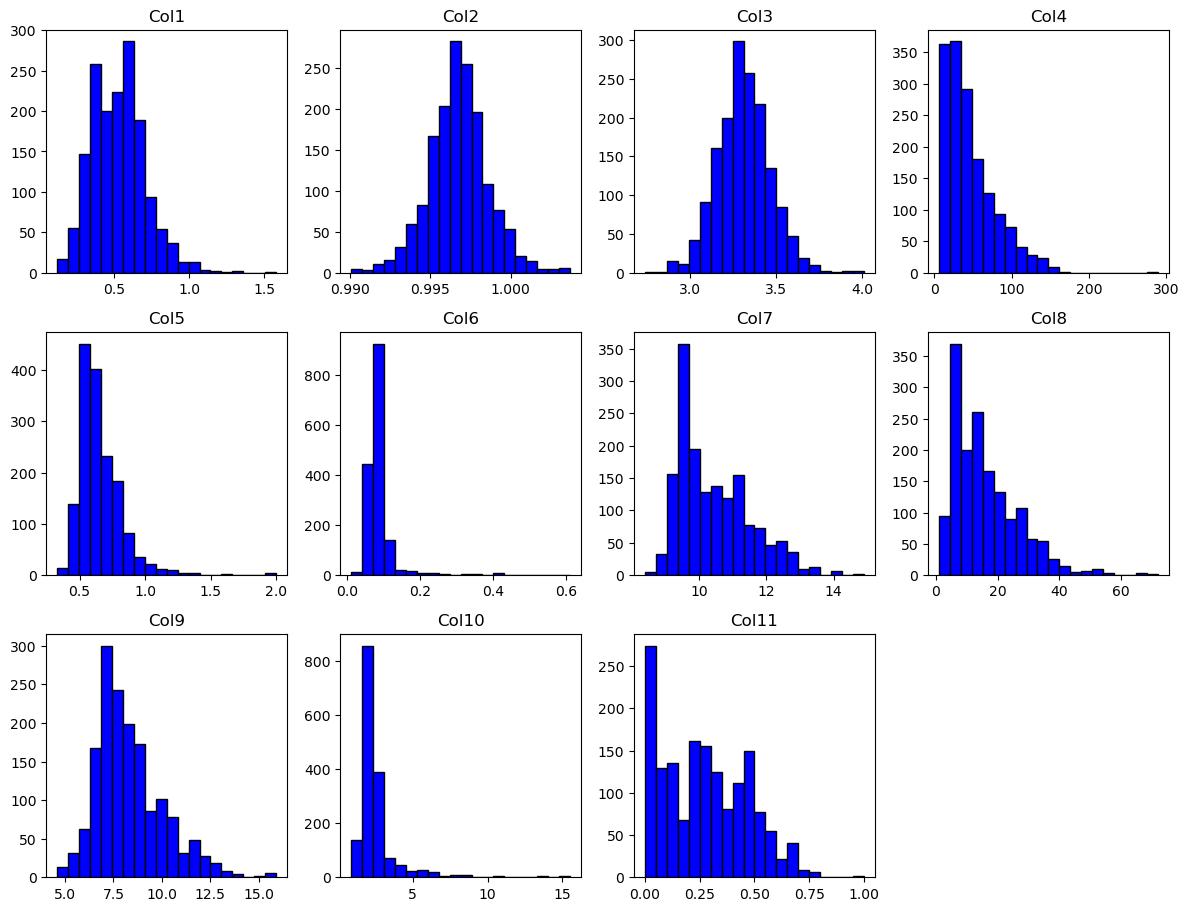

In [229]:
columns = dataset_anonymized.columns
fig = plt.figure(figsize=(12,12))
for i in range(0,11):
  ax = plt.subplot(4,4,i+1)
  ax.hist(dataset_anonymized[columns[i]],bins = 20, color='blue', edgecolor='black')
  ax.set_title(dataset_anonymized.head(0)[columns[i]].name)
plt.tight_layout()
plt.show()

## 2.6 División de Datos y Estandarización

Y por último, se dividen los datos en conjuntos de entrenamiento y prueba, donde las características se estandarizan mediante la función StandardScaler(), de tal forma que se garantice que todas las características tengan media 0 y desviación estándar 1, algo muy importante en algoritmos sensibles a la escala de datos.

In [230]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.25, random_state=1, stratify=y)

In [231]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [232]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [  0   0   0  10  53 681 638 199  18]
Labels counts in y_train: [  0   0   0   8  40 511 478 149  13]
Labels counts in y_test: [  0   0   0   2  13 170 160  50   5]


ANÁLISIS DE LOS RESULTADOS

Como se puede ver, el dataset ha quedado dividido en un 25% de datos de prueba y un 75% de datos de entrenamiento. Es importante mencionar que la estandarización asegura que todas las características se encuentren en una escala comparable, algo esencial para algoritmos como Redes Neuronales o Máquinas de Soporte Vectorial (SVM, Support Vector Machines), lo que les permite mejorar la estabilidad y la precisión del modelo.

# TEMA 3: Clasificadores

## 3.1 Regresión Logística (Logistic Regression)

A continuación, se explican brevemente los parámetros utilizados:

* C = 100.0: El parámetro de regularización C controla la penalización aplicada a los errores. Un valor alto de C indica que se permite una menor penalización, por lo que el modelo intenta ajustar más los datos.

* solver = ’lbfgs’: El solver ’lbfgs’ es un optimizador recomendado para solucionar problemas pequeños y medianos.

* multi_class = ’ovr’: Procedente de las siglas OnevsRest (OVR), significa que para la clasificación multiclase, el modelo entrenara un clasificador independiente para cada clase.

In [233]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % lr.score(X_test_std, y_test))

# CÁLCULO DE LA PRECISIÓN CON ACCURACY SCORE
# from sklearn.metrics import accuracy_score
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

/home/aalberto/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Misclassification samples: 165
530      True
1424    False
903      True
1382     True
587      True
        ...  
675     False
1510     True
1002    False
969      True
52      False
Name: Target, Length: 400, dtype: bool
Accuracy: 0.588


ÁNÁLISIS DE LOS RESULTADOS

El modelo de Regresión Logística (Logistic Regression) muestra una precisión del 58.8% (0.588) en el conjunto de prueba, con 165 muestras mal clasificadas. Esto significa que el modelo logra clasificar correctamente la mayoría de los casos, aunque aún persisten algunos errores.

Este modelo es útil para establecer una línea base, ya que es rápido y su interpretabilidad es alta, aunque puede darse el caso en el que no se capaz de captar relaciones complejas entre los datos.

## 3.2 Máquinas de Soporte Vectorial (SVM)

A continuación, se explican brevemente los parámetros utilizados:

* kernel = ’rbf’: Se utiliza el kernel radial base (RBF), que es adecuado para problemas no lineales.

* gamma = 0.7: Controla el grado de influencia de los puntos individuales. Un valor bajo significa que el área de influencia de cada punto es alta, mientras que un valor alto restringe el área.

* C = 30.0: Controla el grado de penalización aplicado a los errores de clasificación. Un valor más alto de C tiende a reducir los errores de clasificación en el conjunto de entrenamiento.

In [234]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, gamma=0.7, C=30.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % svm.score(X_test_std, y_test))

# CÁLCULO DE LA PRECISIÓN CON ACCURACY SCORE
# from sklearn.metrics import accuracy_score
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassification samples: 157
530     False
1424     True
903      True
1382     True
587      True
        ...  
675     False
1510     True
1002    False
969      True
52      False
Name: Target, Length: 400, dtype: bool
Accuracy: 0.608


ANÁLISIS DE LOS RESULTADOS

El modelo de Máquinas de Soporte Vectorial (SVM) alcanza una precisión del 60.8% (0.608) en el conjunto de prueba, con 157 muestras mal clasificadas, lo que hace ver que el modelo tiene un buen desempeño en la separación de clases del dataset.

Este modelo con núcleo RBF es eficaz en problemas de clasificación no lineales, aunque en ocasiones se puede requerir un ajuste de hiperparámetros para optimizar su rendimiento.

## 3.3 Árboles de Decisión (Decision Trees)

A continuacion, se explican brevemente los parámetros utilizados:

* criterion = ’gini’: Utiliza el ı́ndice de Gini para medir la pureza de los nodos.

* max_depth = 4: La profundidad máxima del árbol se fija en 4 para evitar el sobreajuste.

In [235]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

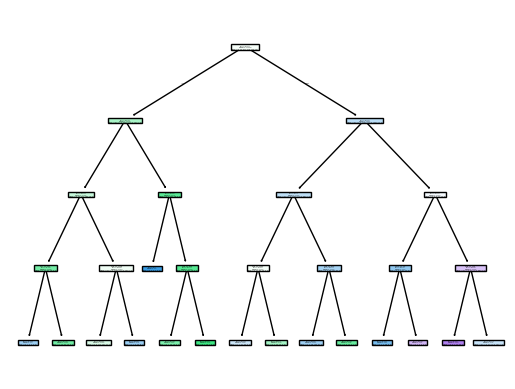

Misclassification samples: 172
530     False
1424    False
903      True
1382     True
587     False
        ...  
675     False
1510     True
1002     True
969      True
52      False
Name: Target, Length: 400, dtype: bool
Accuracy: 0.570


In [236]:
from sklearn import tree

# USANDO TODAS LAS CARACTERÍSTICAS DE LOS DATOS
feature_names = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 'Col11']

# USANDO N CARACTERÍSTICAS DE LOS DATOS
# feature_names = ['Col1', 'Col2', ..., 'ColN']

tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)
plt.show()
y_pred = tree_model.predict(X_test)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % tree_model.score(X_test, y_test))

# CÁLCULO DE LA PRECISIÓN CON ACCURACY SCORE
# from sklearn.metrics import accuracy_score
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

ANÁLISIS DE LOS RESULTADOS

El modelo de Árboles de Decisión (Decision Trees) alcanza una precisión del 57.0% (0.570) en el conjunto de prueba, con 172 muestras mal clasificadas.

Este modelo proporciona una interpretación visual y clara del proceso de decisión y las variables importantes. Sin embargo, aunque no puede ser tan preciso como modelos más complejos, es valioso por su interpretabilidad y facilidad para detectar patrones simples en los datos.

## 3.4 Bosque Aleatorio (Random Forest)

A continuación, se explican brevemente los parámetros utilizados:

* n_estimators = 25: Número de árboles en el bosque. Un mayor número generalmente mejora la precisión hasta cierto punto, pero incrementa el tiempo de cálculo.

* random_state = 1: Controla la aleatoriedad en la construcción de árboles, permitiendo reproducibilidad de los resultados al fijarse a un valor específico.

* n_jobs = 2: Número de núcleos de procesamiento que se utilizarán. Si se establece en -1, se usarán todos los núcleos disponibles, acelerando el entrenamiento en sistemas multiprocesador.

In [237]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, 
                                random_state=1,
                                n_jobs=2)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % forest.score(X_test, y_test))

# CÁLCULO DE LA PRECISIÓN CON ACCURACY SCORE
# from sklearn.metrics import accuracy_score
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassification samples: 133
530      True
1424    False
903      True
1382     True
587      True
        ...  
675     False
1510     True
1002     True
969      True
52      False
Name: Target, Length: 400, dtype: bool
Accuracy: 0.667


ANÁLISIS DE LOS RESULTADOS

El modelo de Bosque Aleatorio (Random Forest) alcanza una precisión del 66.7% (0.667) en el conjunto de prueba, con 133 muestras mal clasificadas.

Este modelo es robusto y suele ofrecer una alta precisión, dado que combina múltiples árboles y promedia sus predicciones, lo que reduce el riesgo de sobreajuste y mejora la generalización.

## 3.5 Vecinos Más Cercanos (KNN)

A continuación, se explican brevemente los parámetros utilizados:

* n_neighbors = 2: Número de vecinos a considerar para clasificar una muestra. Un valor bajo puede hacer que el modelo sea sensible al ruido, mientras que un valor muy alto puede suavizar en exceso.

* p = 2: Parámetro de la distancia de Minkowski. Cuando p=2 se usa la distancia euclidiana; si p=1, se usa la distancia de Manhattan.

* metric = 'minkowski': La métrica de distancia utilizada para calcular la cercanía entre puntos. "minkowski" es una opción común, que permite ajustar la distancia con el parámetro p.

In [238]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2, 
                           p=2, 
                           metric='minkowski')

knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
print('Misclassification samples: %d' % (y_test != y_pred).sum())
print(y_test != y_pred)
print('Accuracy: %.3f' % knn.score(X_test_std, y_test))

# CÁLCULO DE LA PRECISIÓN CON ACCURACY SCORE
# from sklearn.metrics import accuracy_score
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassification samples: 170
530     False
1424     True
903      True
1382     True
587      True
        ...  
675     False
1510     True
1002     True
969      True
52      False
Name: Target, Length: 400, dtype: bool
Accuracy: 0.575


ANÁLISIS DE LOS RESULTADOS

El modelo de Vecinos Más Cercanos (KNN) alcanza una precisión del 57.5% (0.575) en el conjunto de prueba, con 170 muestras mal clasificadas.

Este modelo, aunque puede ofrecer un buen rendimiento, su precisión suele depender de la elección del número de vecinos y de una adecuada estandarización de los datos. Además, es útil en conjuntos de datos pequeños y bien distribuidos, aunque puede ser sensible a la escala de datos y al ruido.

# TEMA 4: Análisis Exploratorio de Datos (Regresión)

...

# TEMA 5: Métodos de Regresión

...

# ANEXO: Convertir Jupyter Notebook a Fichero Python

## A.1 Script en el Directorio Actual

In [239]:
# Script 'convert_notebook_to_script.py' en el directorio actual
! python .convert_notebook_to_script.py --input formulario_ep1.ipynb --output formulario_ep1.py

[NbConvertApp] Converting notebook formulario_ep1.ipynb to script
[NbConvertApp] Writing 17093 bytes to formulario_ep1.py


## A.2 Script en el Directorio Padre

In [240]:
# Script 'convert_notebook_to_script.py' en el directorio padre
! python ../.convert_notebook_to_script.py --input formulario_ep1.ipynb --output formulario_ep1.py

[NbConvertApp] Converting notebook formulario_ep1.ipynb to script
[NbConvertApp] Writing 17093 bytes to formulario_ep1.py
